<a href="https://colab.research.google.com/github/subbu27iitb/General/blob/main/Outlier_removal_RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Outlier removal by RANSAC**

**Reference:**

https://www.youtube.com/watch?v=QpbydcPdcGw

In [72]:
import numpy as np
import pandas as pd

In [73]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",  sep='\s+')
df.head
#df.columns

<bound method NDFrame.head of      0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0    0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1    0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2    0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3    0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4    0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   
..       ...    ...    ... ..     ...     ...    ...     ... ..    ...    ...   
500  0.06263    0.0  11.93  0   0.573   6.593   69.1  2.4786  1  273.0   21.0   
501  0.04527    0.0  11.93  0   0.573   6.120   76.7  2.2875  1  273.0   21.0   
502  0.06076    0.0  11.93  0   0.573   6.976   91.0  2.1675  1  273.0   21.0   
503  0.10959    0.0  11.93  0   0.573   6.794   89.3  2.3889  1  273.0   21.0   
504  0.04741    0.0  11.93  0   0.573   6.030   80.8  2.5050  1  273.0   21.0  

In [74]:
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head

<bound method NDFrame.head of         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
1    0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
2    0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
3    0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
4    0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...    ...   
500  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
501  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
502  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
503  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
504  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       17.8  396.90   9.14  21.6  
1       1

In [75]:
X=df[['RM']].values
y=df['MEDV'].values

In [79]:
from sklearn import linear_model
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(linear_model.LinearRegression(), max_trials=100, min_samples=50, loss=lambda x: np.sum(abs(x), axis=1), residual_threshold=5.0, random_state=0)
ransac.fit(X, y)
inliers=ransac.inlier_mask_
outliers = np.logical_not(inliers)
line_X = np.arange(3,10,1)
line_Y = rasac.predict(line_X[:,np.newaxis])

TypeError: ignored

**Reference 2:**

https://www.youtube.com/watch?v=6lEPn1WkjVg

Steps:

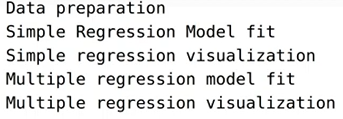

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

#from pydataset import data

ModuleNotFoundError: ignored

In [7]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 3.6 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=f8d0d4e2a732598f8a2551ee11feae7585958f15b345c4c19c3ee25caffab3b1
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [8]:
from pydataset import data

initiated datasets repo at: /root/.pydataset/


In [14]:
df = data('tips')
df.head()
#df['time'].unique()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
X= df[['total_bill','sex', 'smoker', 'time', 'size']]
#X.head()
y= df[["tip"]]
#y.head()
male= pd.get_dummies(X['sex'])
#male
X['male_only']= male['Male']
#X.head()
smoker= pd.get_dummies(X['smoker'])
#smoker
X['smoker_yes']= smoker['Yes']
#X.head()
dinner = pd.get_dummies(X['time'])
dinner
X['dinner_yes']= dinner['Dinner']
#X.head()
X=X.drop(['sex', 'smoker', 'time'], axis=1)
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,total_bill,size,male_only,smoker_yes,dinner_yes
1,16.99,2,0,0,1
2,10.34,3,1,0,1
3,21.01,3,1,0,1
4,23.68,2,1,0,1
5,24.59,4,0,0,1


Note: (Verify later)

Arguments to ransac shd be dataframe i.e., pandas.core.frame.DataFrame not pandas.core.series.Series

Hence, it shd be X[['xx']] but not X['xx].

                              OR

Arguments to ransac shd be 2-d array. Hence, it shd be X[['xx']] but not X['xx].

In [44]:
ransac= RANSACRegressor(LinearRegression(), residual_threshold=2, random_state=0)
ransac.fit(X[['total_bill']],y) 
prediction = ransac.predict(X[['total_bill']])
#X['total_bill'].head()
#type(X['total_bill'])
#print("************")
#X[['total_bill']].head()
#type(X[['total_bill']])

print("R2:", r2_score(y,prediction))
print("MAE:", mean_absolute_error(y,prediction))

R2: 0.4381748268686979
MAE: 0.7552429811944833


In [54]:
inliers = ransac.inlier_mask_
outliers= np.logical_not(inliers)
line_X = np.arange(3,51,2)
#line_X
#line_X[:, np.newaxis]
#type(line_X)
line_y = ransac.predict(line_X[:, np.newaxis])
#line_y
#type(line_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  "X does not have valid feature names, but"


numpy.ndarray

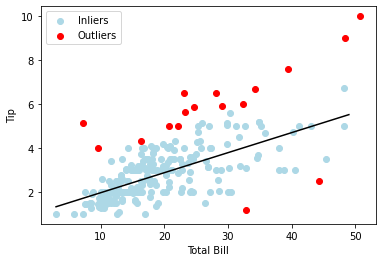

In [62]:
plt.scatter(X[['total_bill']][inliers], y[inliers], label= 'Inliers', c='lightblue')
plt.scatter(X[['total_bill']][outliers], y[outliers], label= 'Outliers', c='red')
plt.plot(line_X, line_y, c='black')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(loc='upper left')

**Multi variable Regression Model**

In [63]:
ransac_multi= RANSACRegressor(LinearRegression(), residual_threshold=2, random_state=0)
ransac_multi.fit(X,y) 
prediction_multi = ransac_multi.predict(X)

print("R2:", r2_score(y,prediction_multi))
print("MAE:", mean_absolute_error(y,prediction_multi))

R2: 0.4298703800652125
MAE: 0.7649733201032204


**Note:** here, predicted value is used for visualization given the plot in 2-D

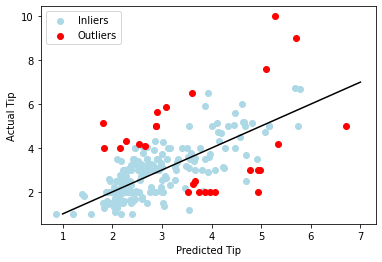

In [71]:
inliers = ransac_multi.inlier_mask_
outliers= np.logical_not(inliers)
line_X= np.arange(1,8,1)
#print(line_X)
#line_y = ransac.predict(line_X[:, np.newaxis])
line_y = line_X[:, np.newaxis]
#line_y
plt.scatter(prediction_multi[inliers], y[inliers], c='lightblue', label='Inliers')
plt.scatter(prediction_multi[outliers], y[outliers], c='red', label='Outliers')
plt.plot(line_X, line_y, c='black')
plt.xlabel('Predicted Tip')
plt.ylabel('Actual Tip')
plt.legend(loc="upper left")